In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('faces.jpg')

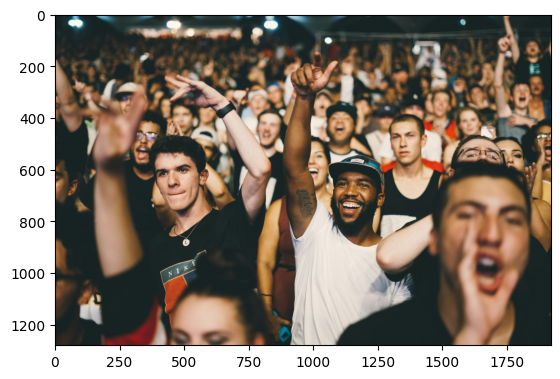

In [3]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

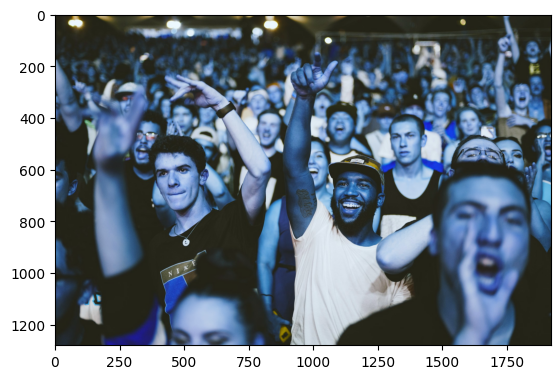

In [4]:
plt.imshow(image)

In [5]:
image.shape

(1280, 1920, 3)

(-0.5, 1919.5, 1279.5, -0.5)

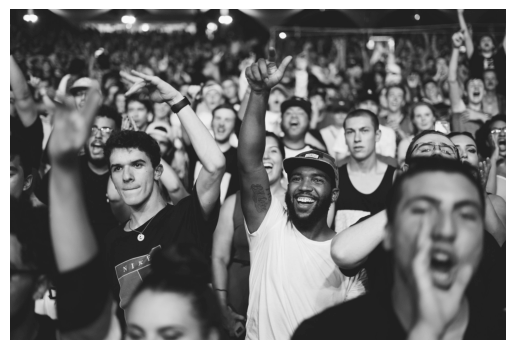

In [6]:
gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.axis('off')

In [7]:
gi = np.zeros_like(image)

In [8]:
len(image)

1280

In [9]:
gra = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [10]:
for i in range(len(gra)):
    for j in range(len(gra[i])):
        sum = np.sum(np.dot([0.2989,0.5870,0.114],gra[i][j]))
        gi[i][j][0] = sum

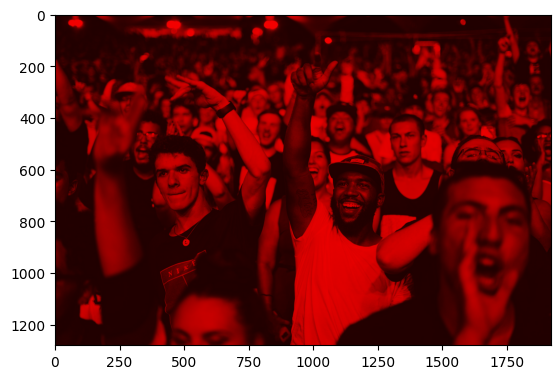

In [11]:
plt.imshow(gi,cmap='gray')

In [12]:
len(gi)

1280

(-0.5, 1919.5, 1279.5, -0.5)

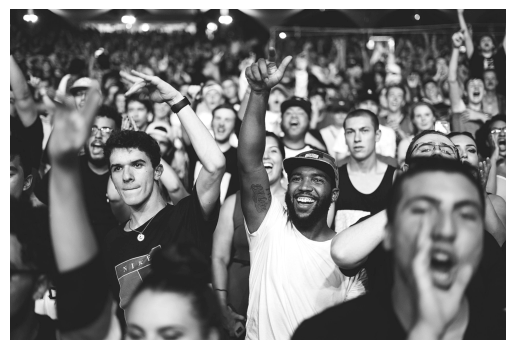

In [13]:
gray1= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

kernel = np.array([[0,-1,0],[-1,5,-1],[0,-0.9,0]])
g= cv2.filter2D(gray1,-1,kernel)
plt.imshow(g,cmap='gray')
plt.axis('off')

In [14]:
cla = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [15]:
faces = cla.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1)

(-0.5, 1919.5, 1279.5, -0.5)

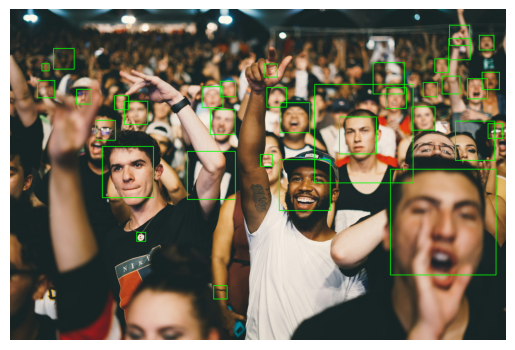

In [16]:
output = image.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [17]:
cla2 = cv2.CascadeClassifier("haarcascade_upperbody.xml")
upperBody = cla2.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1)

(-0.5, 1919.5, 1279.5, -0.5)

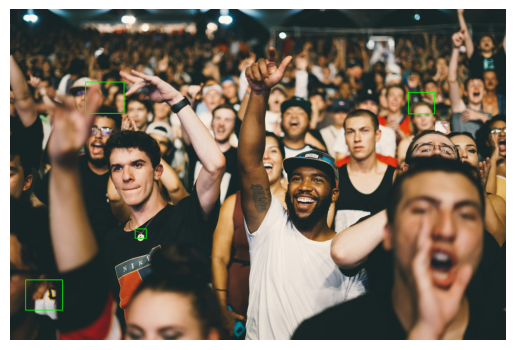

In [18]:
output = image.copy()
for (x, y, w, h) in upperBody:
    cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [19]:
skyline = cv2.imread('skyline.jpg')
plt.figure(figsize=(20,20))
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filtered = cv2.filter2D(cv2.cvtColor(skyline,cv2.COLOR_BGR2GRAY),-1,sobel_x)
plt.imshow(filtered,cmap='gray')
plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [20]:
line = cv2.imread('lines.jpg')

(-0.5, 1919.5, 1279.5, -0.5)

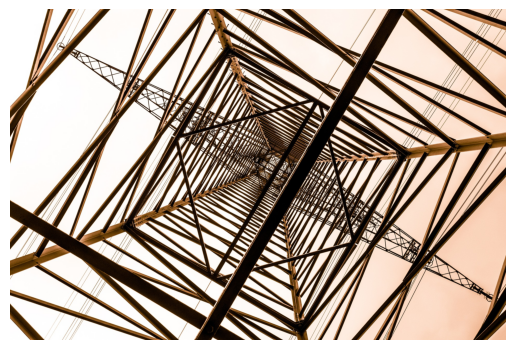

In [21]:
plt.imshow(cv2.cvtColor(line,cv2.COLOR_RGB2BGR))
plt.axis('off')

In [22]:
plt.figure(figsize=(20,20))
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filtered = cv2.filter2D(cv2.cvtColor(line,cv2.COLOR_BGR2RGB),-1,sobel_x)
plt.imshow(filtered,cmap='gray')
plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [23]:
plt.figure(figsize=(20,20))
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
filtered = cv2.filter2D(cv2.cvtColor(line,cv2.COLOR_BGR2GRAY),-1,sobel_y)
plt.imshow(filtered,cmap='gray')
plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [24]:
noise = np.random.normal(0,15,line.shape).astype(np.uint8)
Line_noise = line+noise

plt.figure(figsize=(20,20))
plt.imshow(Line_noise)
plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [25]:
# avg
kernel = np.ones((7,7),np.float32)/49
dst = cv2.filter2D(Line_noise,-1,kernel)
plt.figure(figsize=(20,20))
plt.imshow(dst)


Output hidden; open in https://colab.research.google.com to view.

In [26]:
med_blur = cv2.medianBlur(Line_noise,5)
plt.figure(figsize=(20,20))
plt.imshow(med_blur)

Output hidden; open in https://colab.research.google.com to view.

In [27]:
def logT(image,c=50):
    return np.uint8(c*np.log(1+image.astype(np.float32)))

def expT(image,c=1):
    return np.uint8(c*(np.exp(image.astype(np.float32)/2)-1))

def gammaT(image,c=1.0):
    return np.uint8(((image/255)**c)*255)




In [28]:
def gammaM(line,c=1.0):
    return cv2.merge(
        (gammaT(line[:,:,0],c),
        gammaT(line[:,:,1],c),
        gammaT(line[:,:,2],c))
    )


In [29]:
plt.figure(figsize=(20,20))
plt.imshow(gammaM(cv2.cvtColor(line,cv2.COLOR_RGB2BGR),5),cmap='gray')

Output hidden; open in https://colab.research.google.com to view.

In [30]:
plt.figure(figsize=(20,20))
plt.imshow(logT(cv2.cvtColor(line,cv2.COLOR_RGB2BGR)))

Output hidden; open in https://colab.research.google.com to view.

In [31]:
plt.figure(figsize=(20,20))
plt.imshow(expT(cv2.cvtColor(line,cv2.COLOR_RGB2BGR)))

Output hidden; open in https://colab.research.google.com to view.

In [32]:
plt.figure(figsize=(20,20))
plt.imshow(gammaT(cv2.cvtColor(line,cv2.COLOR_RGB2BGR),2))

Output hidden; open in https://colab.research.google.com to view.

(-0.5, 1919.5, 1279.5, -0.5)

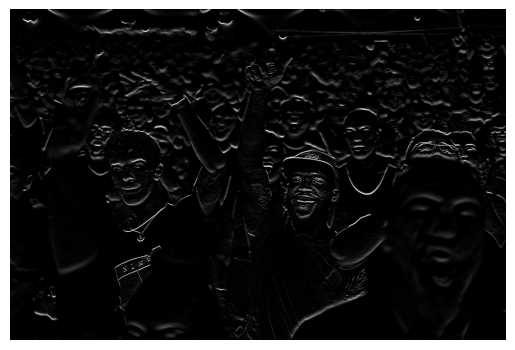

In [33]:
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
filtered = cv2.filter2D(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY),-1,sobel_y)
plt.imshow(filtered,cmap='gray')
plt.axis('off')

(-0.5, 1919.5, 1279.5, -0.5)

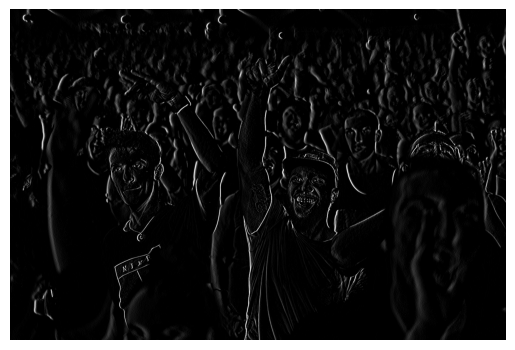

In [34]:
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filtered = cv2.filter2D(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY),-1,sobel_x)
plt.imshow(filtered,cmap='gray')
plt.axis('off')

In [35]:
compressor = cv2.imread('comp.jpg')

(-0.5, 1919.5, 1919.5, -0.5)

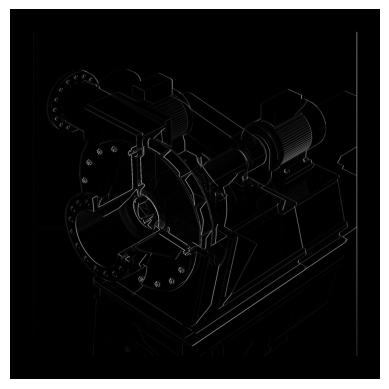

In [36]:
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
filtered = cv2.filter2D(cv2.cvtColor(compressor,cv2.COLOR_BGR2GRAY),-1,sobel_x)
plt.imshow(filtered,cmap='gray')
plt.axis('off')

(-0.5, 1919.5, 1919.5, -0.5)

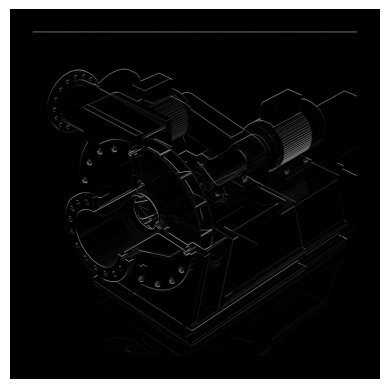

In [37]:
sobel_y = np.array([[1,2,1],[-0,0,-0],[-1,-2,-1]])
filtered = cv2.filter2D(cv2.cvtColor(compressor,cv2.COLOR_BGR2GRAY),-1,sobel_y)
plt.imshow(filtered,cmap='gray')
plt.axis('off')



In [38]:
def finC(image,binary=127):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    else:
        image = image
    ret,thresh1 = cv2.threshold(image,binary,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    imageC = image.copy()
    cv2.drawContours(imageC,contours,-1,(0,255,0),3)
    return imageC,contours,hierarchy



In [39]:
crowd = cv2.imread('crowd.jpg')
imageC,contours,hierarchy = finC(crowd)
plt.figure(figsize=(20,20))
plt.imshow(crowdC)

NameError: name 'crowdC' is not defined

<Figure size 2000x2000 with 0 Axes>

In [40]:
def erosion(image,kernalSize=(5,5),iterations=1):
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(image,kernalSize,iterations = iterations)
    return erosion


def dilation(image,kernalSize=(5,5),iterations=1):
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.dilate(image,kernalSize,iterations = iterations)
    return erosion

In [41]:
crowd = cv2.imread('crowd.jpg')
imag1 = dilation(cv2.cvtColor(crowd,cv2.COLOR_BGR2GRAY))
plt.figure(figsize=(20,20))
plt.imshow(imag1,cmap='gray')

Output hidden; open in https://colab.research.google.com to view.

In [42]:
crowd = cv2.imread('crowd.jpg')
imag = erosion(cv2.cvtColor(crowd,cv2.COLOR_BGR2GRAY))
plt.figure(figsize=(20,20))
plt.imshow(imag,cmap='gray')

Output hidden; open in https://colab.research.google.com to view.

In [43]:
def find_blobs(image,min_blob_size=100):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    else:
        image = image
    ret,thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    imageC = image.copy()
    cv2.drawContours(imageC,contours,-1,(0,255,0),3)
    return imageC


In [44]:
crowd = cv2.imread('crowd.jpg')
imag = find_blobs(cv2.cvtColor(crowd,cv2.COLOR_BGR2GRAY),500)
plt.figure(figsize=(20,20))
plt.imshow(imag,cmap='gray')

Output hidden; open in https://colab.research.google.com to view.